# Importing relevant libraries and functions for Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Import the train and test datasets

In [2]:
featuretrain_X = pd.read_csv('features_train.csv')
featuretest_X = pd.read_csv('features_test.csv')
targettrain_y = pd.read_csv('target_train.csv')
targettest_y = pd.read_csv('target_test.csv')

In [3]:
featuretrain_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,1,1,1,2,0,4,2,1,2,...,1,0,1,0,0,1,0,1,1,0
1,1,3,3,1,2,0,4,3,1,2,...,1,0,0,1,0,1,0,1,0,1
2,1,4,2,1,3,0,5,3,1,3,...,1,0,0,1,0,1,0,1,1,0
3,1,3,3,3,2,0,5,3,1,3,...,0,1,1,0,0,1,0,1,1,0
4,1,1,1,1,3,0,4,4,1,1,...,1,0,0,1,0,1,1,0,0,1


In [4]:
featuretest_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,3,1,1,1,3,5,5,5,5,...,1,0,1,0,1,0,0,1,0,1
1,1,3,3,2,2,0,4,2,1,3,...,1,0,1,0,0,1,0,1,0,1
2,1,2,2,1,1,0,4,5,2,4,...,1,0,0,1,0,1,0,1,0,1
3,1,3,3,2,4,1,5,5,3,4,...,1,0,0,1,0,1,1,0,1,0
4,1,2,1,1,2,0,4,5,1,1,...,1,0,1,0,0,1,1,0,0,1


In [5]:
targettrain_y.head(5)

,grade
0,Average
1,Average
2,High
3,Average
4,Average


In [6]:
targettest_y.head(5)

,grade
0,Average
1,Average
2,Average
3,Average
4,Average


## Gradient Boosting

In [7]:
# Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(featuretrain_X, targettrain_y)

# Predictions
gb_predictions = gradient_boosting_model.predict(featuretest_X)

# Evaluation
gb_accuracy = accuracy_score(targettest_y, gb_predictions)
gb_report = classification_report(targettest_y, gb_predictions)

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Classification Report:\n", gb_report)

C:\Users\limwe\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 0.7751196172248804
Classification Report:
               precision    recall  f1-score   support

     Average       0.84      0.89      0.86       165
        High       0.57      0.36      0.44        33
         Low       0.23      0.27      0.25        11

    accuracy                           0.78       209
   macro avg       0.55      0.51      0.52       209
weighted avg       0.77      0.78      0.77       209



**For the ‘Average’ class, the model has a precision of 0.84, recall of 0.90, and F1-score of 0.87. This means that the model is performing well on the ‘Average’ class but not as well on the ‘High’ and ‘Low’ classes based on the F1-score. This might be because the average classes data is much more compared to that of the 'High' and 'Low' classes.**

**The Gradient Boosting model does well with an overall F1-score accuracy of 0.78.**

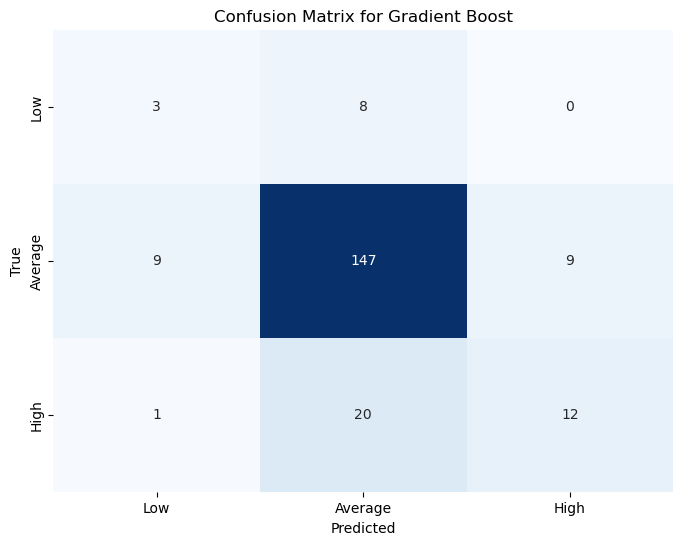

In [11]:
# Define Class labels
class_labels = ['Low', 'Average', 'High']

# Generate confusion matrix
cm = confusion_matrix(targettest_y, gb_predictions, labels=class_labels)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Gradient Boost')
plt.show()

**As expected, the model was able to do well in predicting the 'Average' class results, but not so much for the 'High' and 'Low' classes.**

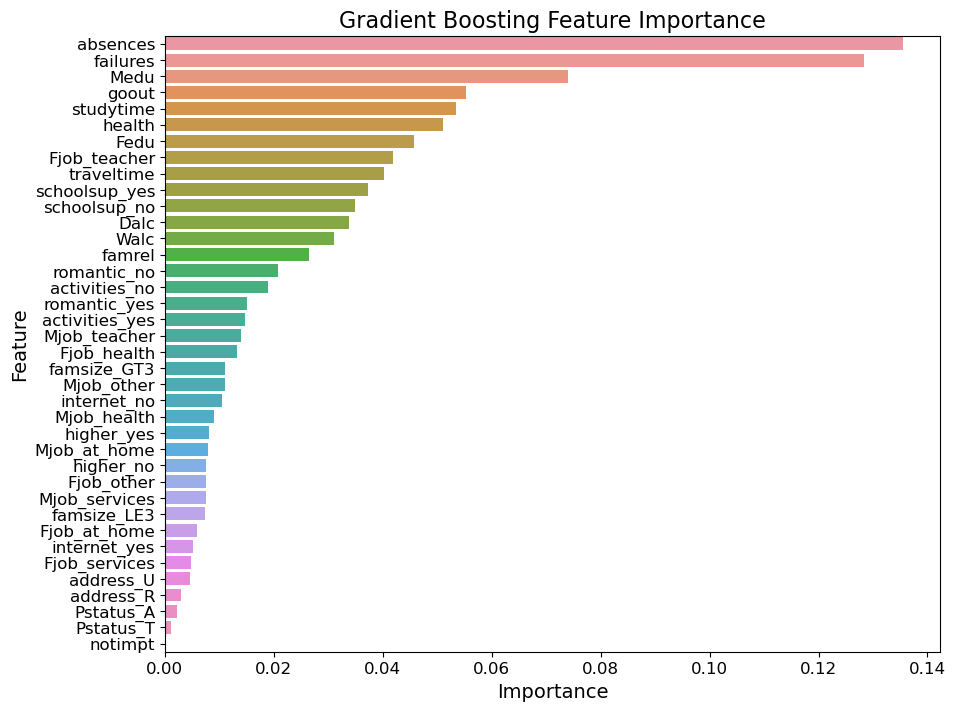

In [15]:
# Feature Importance
plt.figure(figsize=(10, 8))  # Set the figure size
feature_importances = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': gradient_boosting_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Gradient Boosting Feature Importance', fontsize=16)  # Adjust the title font size
plt.xlabel('Importance', fontsize=14)  # Adjust the x-axis label font size
plt.ylabel('Feature', fontsize=14)  # Adjust the y-axis label font size
plt.xticks(fontsize=12)  # Adjust the x-axis tick font size
plt.yticks(fontsize=12)  # Adjust the y-axis tick font size
plt.show()

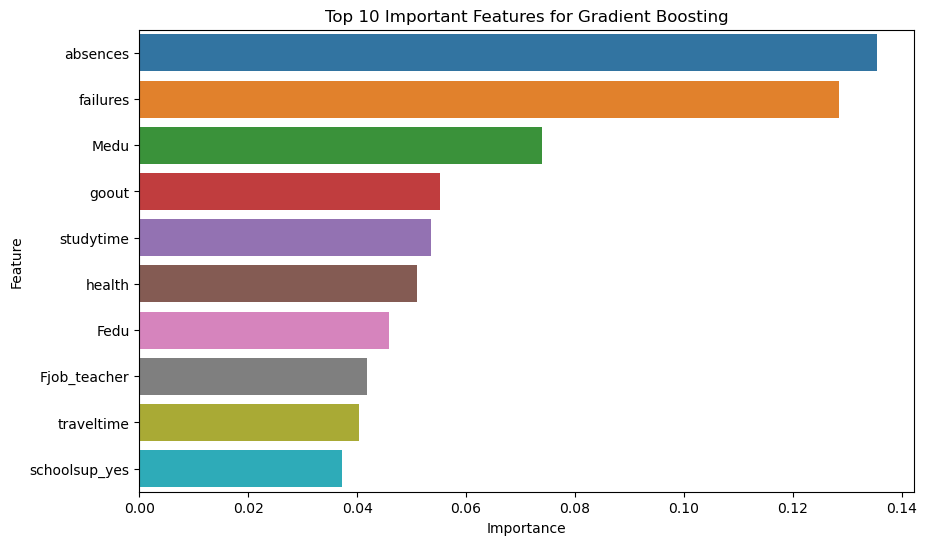

In [16]:
gb_importances = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': gradient_boosting_model.feature_importances_})
gb_importances.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importances.head(10))
plt.title('Top 10 Important Features for Gradient Boosting')
plt.show()

**As seen from the above bar graph, we can see that if a student is often absent, it will affect their grades a lot. Next most significant factor would be failures, as their past factors might be dragging their overall results down.**